In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import warnings
# warnings.filterswarnings('ignore')

In [37]:
file_path = r'C:\Users\614654958\OneDrive - BT Plc\download_one_drive\Personal Stuff\upgrad\github\Bike_Sharing_Case_Study\day.csv'
br = pd.read_csv(file_path)
br.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [38]:
br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


No nul values hence imputing no required

In [39]:
br.shape

(730, 16)

In [40]:
br.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


High level flow

1. Read, understanding and visualising the data.
2. Preparing the dataset (train test split, scaling)
3. Training the model.
4. Resdiual analysis
5. Prediction and evaluation on the test set

## Understanding the data

In [41]:
## since instant holds the index values, let get rid of it
br = br.drop('instant', axis=1)

In [42]:
# sns.pairplot(br)
# plt.show()

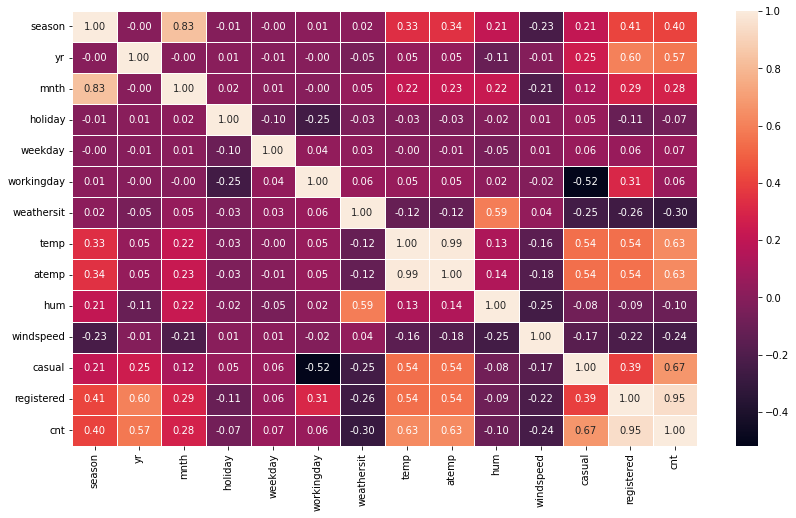

In [43]:
plt.figure(figsize=(14,8))
sns.heatmap(br.corr(), annot=True, linewidth=.5, fmt=".2f")
plt.show()

Following are the observations
1. 'cnt' hightly co related with registered
2. temp and atemp are closed co realted to each other
3. holiday, hum, windspeed and weathersit are negitively co realted
4. weekday and working day are weekly co realted

Following conclusion are drawn
1. drop atemp as most of its imformation is represented by temp.
2. dropping working day and hum as they have very low co relation with the tragets

In [44]:
br = br.drop(['atemp', 'workingday', 'hum'], axis=1)
br.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit',
       'temp', 'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

## Preparing the data for Modelling

In [45]:
br.head()

,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,2,14.110847,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,2,14.902598,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,8.050924,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,8.200000,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,9.305237,12.522300,82,1518,1600


In [46]:
## getting rid of date column
br = br.drop('dteday', axis=1)

### Encoding the categorical variables

In [47]:
# cat variables require endocding
cat_variables=['season', 'mnth', 'weekday', 'weathersit']

In [48]:
transformer = make_column_transformer(
    (OneHotEncoder(), cat_variables),
    remainder='passthrough')

transformed = transformer.fit_transform(br)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names_out()
)

In [49]:
transformed_df.columns

Index(['onehotencoder__season_1', 'onehotencoder__season_2',
       'onehotencoder__season_3', 'onehotencoder__season_4',
       'onehotencoder__mnth_1', 'onehotencoder__mnth_2',
       'onehotencoder__mnth_3', 'onehotencoder__mnth_4',
       'onehotencoder__mnth_5', 'onehotencoder__mnth_6',
       'onehotencoder__mnth_7', 'onehotencoder__mnth_8',
       'onehotencoder__mnth_9', 'onehotencoder__mnth_10',
       'onehotencoder__mnth_11', 'onehotencoder__mnth_12',
       'onehotencoder__weekday_0', 'onehotencoder__weekday_1',
       'onehotencoder__weekday_2', 'onehotencoder__weekday_3',
       'onehotencoder__weekday_4', 'onehotencoder__weekday_5',
       'onehotencoder__weekday_6', 'onehotencoder__weathersit_1',
       'onehotencoder__weathersit_2', 'onehotencoder__weathersit_3',
       'remainder__yr', 'remainder__holiday', 'remainder__temp',
       'remainder__windspeed', 'remainder__casual', 'remainder__registered',
       'remainder__cnt'],
      dtype='object')

In [50]:
transformed_df.head()

,onehotencoder__season_1,onehotencoder__season_2,onehotencoder__season_3,onehotencoder__season_4,onehotencoder__mnth_1,onehotencoder__mnth_2,onehotencoder__mnth_3,onehotencoder__mnth_4,onehotencoder__mnth_5,onehotencoder__mnth_6,...,onehotencoder__weathersit_1,onehotencoder__weathersit_2,onehotencoder__weathersit_3,remainder__yr,remainder__holiday,remainder__temp,remainder__windspeed,remainder__casual,remainder__registered,remainder__cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,14.110847,10.749882,331.0,654.0,985.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,14.902598,16.652113,131.0,670.0,801.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,8.050924,16.636703,120.0,1229.0,1349.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,8.200000,10.739832,108.0,1454.0,1562.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,9.305237,12.522300,82.0,1518.0,1600.0


### Performing the train test split

In [51]:
X = transformed_df.drop('remainder__cnt', axis=1)
y = transformed_df.remainder__cnt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [52]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(730, 32)
(511, 32)
(219, 32)


### Rescaling the features

## understanding the distribution of the features to be scaled

In [53]:
## features to be scaled

features=['remainder__temp',
       'remainder__windspeed', 'remainder__casual', 'remainder__registered',
       'remainder__cnt']

transformed_df[features].head()

,remainder__temp,remainder__windspeed,remainder__casual,remainder__registered,remainder__cnt
0,14.110847,10.749882,331.0,654.0,985.0
1,14.902598,16.652113,131.0,670.0,801.0
2,8.050924,16.636703,120.0,1229.0,1349.0
3,8.200000,10.739832,108.0,1454.0,1562.0
4,9.305237,12.522300,82.0,1518.0,1600.0


<AxesSubplot: xlabel='remainder__cnt', ylabel='Density'>

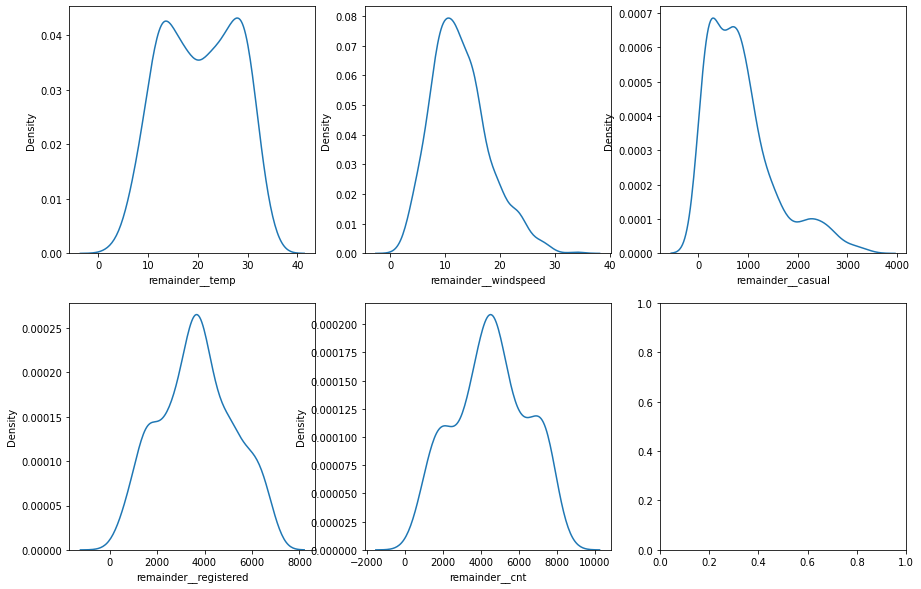

In [54]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

#create chart in each subplot
sns.kdeplot(transformed_df.remainder__temp, ax=axes[0,0])

sns.kdeplot(transformed_df.remainder__windspeed, ax=axes[0,1])

sns.kdeplot(transformed_df.remainder__casual, ax=axes[0,2])

sns.kdeplot(transformed_df.remainder__registered, ax=axes[1,0])

sns.kdeplot(transformed_df.remainder__cnt, ax=axes[1,1])

As this distribution is not close to normal or gaussian distribution hence choosing min max scaler for scaling

In [55]:
numberic_variable = ['remainder__temp',
       'remainder__windspeed', 'remainder__casual', 'remainder__registered']
# X_train[features]

scaler = MinMaxScaler()
X_train[numberic_variable] = scaler.fit_transform(X_train[numberic_variable])
X_train[numberic_variable].head()

,remainder__temp,remainder__windspeed,remainder__casual,remainder__registered
683,0.327133,0.327101,0.095899,0.721133
645,0.403972,0.419004,0.266728,0.641348
163,0.717562,0.708724,0.263336,0.572894
360,0.331287,0.415925,0.028986,0.098469
640,0.745598,0.110593,0.221708,0.984380


In [56]:
X_train.head()

,onehotencoder__season_1,onehotencoder__season_2,onehotencoder__season_3,onehotencoder__season_4,onehotencoder__mnth_1,onehotencoder__mnth_2,onehotencoder__mnth_3,onehotencoder__mnth_4,onehotencoder__mnth_5,onehotencoder__mnth_6,...,onehotencoder__weekday_6,onehotencoder__weathersit_1,onehotencoder__weathersit_2,onehotencoder__weathersit_3,remainder__yr,remainder__holiday,remainder__temp,remainder__windspeed,remainder__casual,remainder__registered
683,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.327133,0.327101,0.095899,0.721133
645,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.403972,0.419004,0.266728,0.641348
163,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.717562,0.708724,0.263336,0.572894
360,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.331287,0.415925,0.028986,0.098469
640,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.745598,0.110593,0.221708,0.984380


### Feature Reduction using stats model

In [57]:
# build the model with all variables
X_train_sm = sm.add_constant(X_train)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         remainder__cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.572e+30
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:41:56   Log-Likelihood:                 12445.
No. Observations:                 511   AIC:                        -2.483e+04
Df Residuals:                     482   BIC:                        -2.471e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         234.8684   1.17e-12   2.01e+14      0.000     234.868     234.868
onehotencoder__season_1        58.7171   1.36e-12    4.3e+13      0.000      58.717      58.717
onehotencoder__season_2        58.7171    1.3e-12   4.51e+13      0.000      58.717      58.717
onehotencoder__season_3        58.7171   1.32e-12   4.45e+13      0.000      58.717      58.717
onehotencoder__season_4        58.7171   1.36e-12   4.31e+13      0.000      58.717      58.717
onehotencoder__mnth_1          19.5724    1.8e-12   1.09e+13      0.000      19.572      19.572
onehotencoder__mnth_2          19.5724   1.75e-12   1.12e+13      0.000      19.572      19.572
onehotencoder__mnth_3          19.5724   1.41e-12   1.39e+13      0.000      19.572      19.572
onehotencoder__mnth_4          19.5724    1.6e-12   1.22e+13      0.000      19.572      19.572
onehotencoder__mnth_5          19.5724   1.66e-12   1.18e+13      0.000      19.572      19.572
onehotencoder__mnth_6          19.5724   1.58e-12   1.24e+13      0.000      19.572      19.572
onehotencoder__mnth_7          19.5724   1.81e-12   1.08e+13      0.000      19.572      19.572
onehotencoder__mnth_8          19.5724   1.78e-12    1.1e+13      0.000      19.572      19.572
onehotencoder__mnth_9          19.5724    1.4e-12    1.4e+13      0.000      19.572      19.572
onehotencoder__mnth_10         19.5724   1.59e-12   1.23e+13      0.000      19.572      19.572
onehotencoder__mnth_11         19.5724   1.67e-12   1.18e+13      0.000      19.572      19.572
onehotencoder__mnth_12         19.5724   1.47e-12   1.33e+13      0.000      19.572      19.572
onehotencoder__weekday_0       33.5526   9.47e-13   3.54e+13      0.000      33.553      33.553
onehotencoder__weekday_1       33.5526   8.05e-13   4.17e+13      0.000      33.553      33.553
onehotencoder__weekday_2       33.5526   8.32e-13   4.03e+13      0.000      33.553      33.553
onehotencoder__weekday_3       33.5526   8.41e-13   3.99e+13      0.000      33.553      33.553
onehotencoder__weekday_4       33.5526   8.14e-13   4.12e+13      0.000      33.553      33.553
onehotencoder__weekday_5       33.5526   7.94e-13   4.23e+13      0.000      33.553      33.553
onehotencoder__weekday_6       33.5526   9.79e-13   3.43e+13      0.000      33.553      33.553
onehotencoder__weathersit_1    78.2895    8.3e-13   9.43e+13      0.000      78.289      78.289
onehotencoder__weathersit_2    78.2895   7.38e-13   1.06e+14      0.000      78.289      78.289
onehotencoder__weathersit_3    78.2895   1.41e-12   5.55e+13      0.000      78.289      78.289
remainder__yr                1.386e-12   1.02e-12      1.358      0.175   -6.19e-13    3.39e-12
remainder__holiday          -2.757e-12   2.06e-12     -1.335      0.182   -6.81e-12     1.3e-12
remainder__

### VIF

In [58]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

c:\Users\614654958\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
0,onehotencoder__season_1,inf
14,onehotencoder__mnth_11,inf
25,onehotencoder__weathersit_3,inf
24,onehotencoder__weathersit_2,inf
23,onehotencoder__weathersit_1,inf
22,onehotencoder__weekday_6,inf
21,onehotencoder__weekday_5,inf
20,onehotencoder__weekday_4,inf
19,onehotencoder__weekday_3,inf
18,onehotencoder__weekday_2,inf


In [59]:
## identifying the varibles having high p values and VIF
X = X_train.drop('remainder__temp', axis=1)

In [60]:
X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         remainder__cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.535e+30
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:41:57   Log-Likelihood:                 12757.
No. Observations:                 511   AIC:                        -2.546e+04
Df Residuals:                     483   BIC:                        -2.534e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         234.8684   4.23e-13   5.55e+14      0.000     234.868     234.868
onehotencoder__season_1        58.7171   7.32e-13   8.02e+13      0.000      58.717      58.717
onehotencoder__season_2        58.7171   7.03e-13   8.36e+13      0.000      58.717      58.717
onehotencoder__season_3        58.7171   6.88e-13   8.54e+13      0.000      58.717      58.717
onehotencoder__season_4        58.7171   7.33e-13   8.01e+13      0.000      58.717      58.717
onehotencoder__mnth_1          19.5724   8.89e-13    2.2e+13      0.000      19.572      19.572
onehotencoder__mnth_2          19.5724   9.03e-13   2.17e+13      0.000      19.572      19.572
onehotencoder__mnth_3          19.5724   7.53e-13    2.6e+13      0.000      19.572      19.572
onehotencoder__mnth_4          19.5724   8.69e-13   2.25e+13      0.000      19.572      19.572
onehotencoder__mnth_5          19.5724   8.64e-13   2.27e+13      0.000      19.572      19.572
onehotencoder__mnth_6          19.5724   7.39e-13   2.65e+13      0.000      19.572      19.572
onehotencoder__mnth_7          19.5724   8.49e-13    2.3e+13      0.000      19.572      19.572
onehotencoder__mnth_8          19.5724   8.81e-13   2.22e+13      0.000      19.572      19.572
onehotencoder__mnth_9          19.5724   7.33e-13   2.67e+13      0.000      19.572      19.572
onehotencoder__mnth_10         19.5724   8.62e-13   2.27e+13      0.000      19.572      19.572
onehotencoder__mnth_11         19.5724   8.77e-13   2.23e+13      0.000      19.572      19.572
onehotencoder__mnth_12         19.5724   7.55e-13   2.59e+13      0.000      19.572      19.572
onehotencoder__weekday_0       33.5526   5.13e-13   6.54e+13      0.000      33.553      33.553
onehotencoder__weekday_1       33.5526   4.31e-13   7.79e+13      0.000      33.553      33.553
onehotencoder__weekday_2       33.5526   4.39e-13   7.64e+13      0.000      33.553      33.553
onehotencoder__weekday_3       33.5526   4.44e-13   7.55e+13      0.000      33.553      33.553
onehotencoder__weekday_4       33.5526   4.33e-13   7.75e+13      0.000      33.553      33.553
onehotencoder__weekday_5       33.5526   4.26e-13   7.88e+13      0.000      33.553      33.553
onehotencoder__weekday_6       33.5526   5.31e-13   6.32e+13      0.000      33.553      33.553
onehotencoder__weathersit_1    78.2895   4.36e-13   1.79e+14      0.000      78.289      78.289
onehotencoder__weathersit_2    78.2895   3.72e-13   2.11e+14      0.000      78.289      78.289
onehotencoder__weathersit_3    78.2895   7.36e-13   1.06e+14      0.000      78.289      78.289
remainder__yr                1.421e-13   5.44e-13      0.261      0.794   -9.26e-13    1.21e-12
remainder__holiday           1.094e-12   1.12e-12      0.977      0.329   -1.11e-12     3.3e-12
remainder__

In [61]:
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

c:\Users\614654958\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
0,onehotencoder__season_1,inf
14,onehotencoder__mnth_11,inf
25,onehotencoder__weathersit_3,inf
24,onehotencoder__weathersit_2,inf
23,onehotencoder__weathersit_1,inf
22,onehotencoder__weekday_6,inf
21,onehotencoder__weekday_5,inf
20,onehotencoder__weekday_4,inf
19,onehotencoder__weekday_3,inf
18,onehotencoder__weekday_2,inf


In [62]:
# bedroom seems to have high p value
X = X.drop('remainder__yr', axis=1)

# Building the model
X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         remainder__cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.271e+31
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:41:57   Log-Likelihood:                 12959.
No. Observations:                 511   AIC:                        -2.586e+04
Df Residuals:                     484   BIC:                        -2.575e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         234.8684   2.58e-13   9.11e+14      0.000     234.868     234.868
onehotencoder__season_1        58.7171   4.83e-13   1.22e+14      0.000      58.717      58.717
onehotencoder__season_2        58.7171   4.72e-13   1.24e+14      0.000      58.717      58.717
onehotencoder__season_3        58.7171    4.6e-13   1.28e+14      0.000      58.717      58.717
onehotencoder__season_4        58.7171   4.72e-13   1.24e+14      0.000      58.717      58.717
onehotencoder__mnth_1          19.5724   5.93e-13    3.3e+13      0.000      19.572      19.572
onehotencoder__mnth_2          19.5724   6.06e-13   3.23e+13      0.000      19.572      19.572
onehotencoder__mnth_3          19.5724   5.06e-13   3.87e+13      0.000      19.572      19.572
onehotencoder__mnth_4          19.5724   5.84e-13   3.35e+13      0.000      19.572      19.572
onehotencoder__mnth_5          19.5724   5.76e-13    3.4e+13      0.000      19.572      19.572
onehotencoder__mnth_6          19.5724   4.84e-13   4.05e+13      0.000      19.572      19.572
onehotencoder__mnth_7          19.5724   5.68e-13   3.44e+13      0.000      19.572      19.572
onehotencoder__mnth_8          19.5724   5.87e-13   3.33e+13      0.000      19.572      19.572
onehotencoder__mnth_9          19.5724   4.83e-13   4.05e+13      0.000      19.572      19.572
onehotencoder__mnth_10         19.5724   5.79e-13   3.38e+13      0.000      19.572      19.572
onehotencoder__mnth_11         19.5724    5.8e-13   3.37e+13      0.000      19.572      19.572
onehotencoder__mnth_12         19.5724   4.97e-13   3.94e+13      0.000      19.572      19.572
onehotencoder__weekday_0       33.5526   3.31e-13   1.01e+14      0.000      33.553      33.553
onehotencoder__weekday_1       33.5526   2.87e-13   1.17e+14      0.000      33.553      33.553
onehotencoder__weekday_2       33.5526   2.91e-13   1.15e+14      0.000      33.553      33.553
onehotencoder__weekday_3       33.5526   2.88e-13   1.16e+14      0.000      33.553      33.553
onehotencoder__weekday_4       33.5526   2.82e-13   1.19e+14      0.000      33.553      33.553
onehotencoder__weekday_5       33.5526   2.83e-13   1.18e+14      0.000      33.553      33.553
onehotencoder__weekday_6       33.5526   3.51e-13   9.55e+13      0.000      33.553      33.553
onehotencoder__weathersit_1    78.2895   2.57e-13   3.05e+14      0.000      78.289      78.289
onehotencoder__weathersit_2    78.2895   2.41e-13   3.25e+14      0.000      78.289      78.289
onehotencoder__weathersit_3    78.2895   4.87e-13   1.61e+14      0.000      78.289      78.289
remainder__holiday           -6.75e-13   7.37e-13     -0.916      0.360   -2.12e-12    7.73e-13
remainder__windspeed         3.411e-13   6.19e-13      0.551      0.582   -8.76e-13    1.56e-12
remainder__

In [63]:
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

c:\Users\614654958\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
0,onehotencoder__season_1,inf
14,onehotencoder__mnth_11,inf
25,onehotencoder__weathersit_3,inf
24,onehotencoder__weathersit_2,inf
23,onehotencoder__weathersit_1,inf
22,onehotencoder__weekday_6,inf
21,onehotencoder__weekday_5,inf
20,onehotencoder__weekday_4,inf
19,onehotencoder__weekday_3,inf
18,onehotencoder__weekday_2,inf


In [64]:
# bedroom seems to have high p value
X = X.drop('remainder__windspeed', axis=1)

# Building the model
X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         remainder__cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.054e+30
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:41:57   Log-Likelihood:                 12312.
No. Observations:                 511   AIC:                        -2.457e+04
Df Residuals:                     485   BIC:                        -2.446e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         234.8684   6.76e-13   3.47e+14      0.000     234.868     234.868
onehotencoder__season_1        58.7171    1.7e-12   3.46e+13      0.000      58.717      58.717
onehotencoder__season_2        58.7171   1.66e-12   3.54e+13      0.000      58.717      58.717
onehotencoder__season_3        58.7171   1.62e-12   3.62e+13      0.000      58.717      58.717
onehotencoder__season_4        58.7171   1.67e-12   3.52e+13      0.000      58.717      58.717
onehotencoder__mnth_1          19.5724    2.1e-12   9.31e+12      0.000      19.572      19.572
onehotencoder__mnth_2          19.5724   2.15e-12   9.11e+12      0.000      19.572      19.572
onehotencoder__mnth_3          19.5724   1.79e-12   1.09e+13      0.000      19.572      19.572
onehotencoder__mnth_4          19.5724   2.05e-12   9.56e+12      0.000      19.572      19.572
onehotencoder__mnth_5          19.5724   2.04e-12    9.6e+12      0.000      19.572      19.572
onehotencoder__mnth_6          19.5724   1.71e-12   1.14e+13      0.000      19.572      19.572
onehotencoder__mnth_7          19.5724   2.01e-12   9.72e+12      0.000      19.572      19.572
onehotencoder__mnth_8          19.5724   2.08e-12   9.41e+12      0.000      19.572      19.572
onehotencoder__mnth_9          19.5724   1.71e-12   1.14e+13      0.000      19.572      19.572
onehotencoder__mnth_10         19.5724   2.05e-12   9.55e+12      0.000      19.572      19.572
onehotencoder__mnth_11         19.5724   2.05e-12   9.53e+12      0.000      19.572      19.572
onehotencoder__mnth_12         19.5724   1.76e-12   1.11e+13      0.000      19.572      19.572
onehotencoder__weekday_0       33.5526   1.16e-12    2.9e+13      0.000      33.553      33.553
onehotencoder__weekday_1       33.5526   1.01e-12   3.31e+13      0.000      33.553      33.553
onehotencoder__weekday_2       33.5526   1.03e-12   3.27e+13      0.000      33.553      33.553
onehotencoder__weekday_3       33.5526   1.02e-12   3.28e+13      0.000      33.553      33.553
onehotencoder__weekday_4       33.5526   9.97e-13   3.37e+13      0.000      33.553      33.553
onehotencoder__weekday_5       33.5526      1e-12   3.35e+13      0.000      33.553      33.553
onehotencoder__weekday_6       33.5526   1.23e-12   2.73e+13      0.000      33.553      33.553
onehotencoder__weathersit_1    78.2895   9.01e-13   8.69e+13      0.000      78.289      78.289
onehotencoder__weathersit_2    78.2895   8.45e-13   9.26e+13      0.000      78.289      78.289
onehotencoder__weathersit_3    78.2895   1.69e-12   4.65e+13      0.000      78.289      78.289
remainder__holiday          -3.503e-12   2.61e-12     -1.342      0.180   -8.63e-12    1.63e-12
remainder__casual            3243.0000   3.48e-12   9.31e+14      0.000    3243.000    3243.000
remainder__

In [65]:
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

c:\Users\614654958\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
0,onehotencoder__season_1,inf
1,onehotencoder__season_2,inf
25,onehotencoder__weathersit_3,inf
24,onehotencoder__weathersit_2,inf
23,onehotencoder__weathersit_1,inf
22,onehotencoder__weekday_6,inf
21,onehotencoder__weekday_5,inf
20,onehotencoder__weekday_4,inf
19,onehotencoder__weekday_3,inf
18,onehotencoder__weekday_2,inf


In [66]:
# bedroom seems to have high p value
X = X.drop('remainder__holiday', axis=1)

# Building the model
X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         remainder__cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.944e+30
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:41:58   Log-Likelihood:                 12564.
No. Observations:                 511   AIC:                        -2.508e+04
Df Residuals:                     486   BIC:                        -2.497e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         234.8684    4.1e-13   5.72e+14      0.000     234.868     234.868
onehotencoder__season_1        58.7171   1.04e-12   5.67e+13      0.000      58.717      58.717
onehotencoder__season_2        58.7171   1.01e-12    5.8e+13      0.000      58.717      58.717
onehotencoder__season_3        58.7171   9.89e-13   5.93e+13      0.000      58.717      58.717
onehotencoder__season_4        58.7171   1.02e-12   5.76e+13      0.000      58.717      58.717
onehotencoder__mnth_1          19.5724   1.28e-12   1.53e+13      0.000      19.572      19.572
onehotencoder__mnth_2          19.5724   1.31e-12   1.49e+13      0.000      19.572      19.572
onehotencoder__mnth_3          19.5724   1.09e-12   1.79e+13      0.000      19.572      19.572
onehotencoder__mnth_4          19.5724   1.25e-12   1.57e+13      0.000      19.572      19.572
onehotencoder__mnth_5          19.5724   1.24e-12   1.57e+13      0.000      19.572      19.572
onehotencoder__mnth_6          19.5724   1.04e-12   1.88e+13      0.000      19.572      19.572
onehotencoder__mnth_7          19.5724   1.23e-12   1.59e+13      0.000      19.572      19.572
onehotencoder__mnth_8          19.5724   1.27e-12   1.54e+13      0.000      19.572      19.572
onehotencoder__mnth_9          19.5724   1.05e-12   1.87e+13      0.000      19.572      19.572
onehotencoder__mnth_10         19.5724   1.25e-12   1.57e+13      0.000      19.572      19.572
onehotencoder__mnth_11         19.5724   1.25e-12   1.57e+13      0.000      19.572      19.572
onehotencoder__mnth_12         19.5724   1.07e-12   1.83e+13      0.000      19.572      19.572
onehotencoder__weekday_0       33.5526   6.82e-13   4.92e+13      0.000      33.553      33.553
onehotencoder__weekday_1       33.5526   5.75e-13   5.84e+13      0.000      33.553      33.553
onehotencoder__weekday_2       33.5526   6.25e-13   5.37e+13      0.000      33.553      33.553
onehotencoder__weekday_3       33.5526   6.22e-13    5.4e+13      0.000      33.553      33.553
onehotencoder__weekday_4       33.5526   6.05e-13   5.54e+13      0.000      33.553      33.553
onehotencoder__weekday_5       33.5526   6.11e-13   5.49e+13      0.000      33.553      33.553
onehotencoder__weekday_6       33.5526   7.22e-13   4.65e+13      0.000      33.553      33.553
onehotencoder__weathersit_1    78.2895   5.49e-13   1.43e+14      0.000      78.289      78.289
onehotencoder__weathersit_2    78.2895   5.16e-13   1.52e+14      0.000      78.289      78.289
onehotencoder__weathersit_3    78.2895   1.03e-12   7.61e+13      0.000      78.289      78.289
remainder__casual            3243.0000   2.03e-12    1.6e+15      0.000    3243.000    3243.000
remainder__registered        6530.0000   1.52e-12   4.29e+15      0.000    6530.000    6530.000
===========

In [67]:
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

c:\Users\614654958\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
0,onehotencoder__season_1,inf
1,onehotencoder__season_2,inf
25,onehotencoder__weathersit_3,inf
24,onehotencoder__weathersit_2,inf
23,onehotencoder__weathersit_1,inf
22,onehotencoder__weekday_6,inf
21,onehotencoder__weekday_5,inf
20,onehotencoder__weekday_4,inf
19,onehotencoder__weekday_3,inf
18,onehotencoder__weekday_2,inf


In [68]:
# Final list of relevant features
features_final = ['onehotencoder__season_1', 'onehotencoder__season_2', 'onehotencoder__weathersit_3','onehotencoder__weathersit_2','onehotencoder__weathersit_1',\
    'onehotencoder__weekday_6','onehotencoder__weekday_5','onehotencoder__weekday_4','onehotencoder__weekday_3','onehotencoder__weekday_2','onehotencoder__weekday_1',\
        'onehotencoder__weekday_0','onehtencoder__mnth_12','onehotencoder__mnth_11','onehotencoder__mnth_10','onehotencoder__mnth_9','onehotencoder__mnth_8',
            'onehotencoder__mnth_7','onehotencoder__mnth_6','onehotencoder__mnth_5','onehotencoder__mnth_4','onehotencoder__mnth_3','onehotencoder__mnth_2',\
                'onehotencoder__mnth_1','remainder__casual','remainder__registered']


### Resediual Analysis

In [69]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

683    5445.0
645    5478.0
163    5020.0
360    1162.0
640    7572.0
        ...  
71     2417.0
106    3744.0
270    3907.0
435    5298.0
102    2162.0
Length: 511, dtype: float64

In [87]:
X_train_sm.shape

(511, 29)

C:\Users\614654958\AppData\Local\Temp\ipykernel_17952\917953849.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


<AxesSubplot: ylabel='Density'>

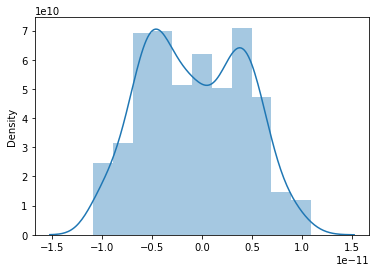

In [71]:
residual = y_train - y_train_pred
sns.distplot(residual)

## Preparing Test data

### Scaling

In [74]:
X_test[numberic_variable]

,remainder__temp,remainder__windspeed,remainder__casual,remainder__registered
468,20.295000,12.791439,2795.0,4665.0
148,27.367500,14.333846,2355.0,2433.0
302,13.085847,11.833339,885.0,2446.0
355,17.356653,3.167425,227.0,2841.0
515,27.880000,13.083693,1100.0,6238.0
...,...,...,...,...
332,18.791653,17.292164,96.0,2818.0
532,24.292500,9.708568,2634.0,4344.0
558,29.998347,5.416950,1511.0,5988.0
137,22.550000,13.499964,536.0,3319.0


In [75]:
X_test[numberic_variable] = scaler.transform(X_test[numberic_variable])
X_test[numberic_variable].head()

,remainder__temp,remainder__windspeed,remainder__casual,remainder__registered
468,0.543115,0.422104,0.859081,0.650689
148,0.758058,0.479765,0.723404,0.308882
302,0.324018,0.386287,0.270120,0.310873
355,0.453814,0.062325,0.067222,0.371363
515,0.773634,0.433030,0.336417,0.891577


In [78]:
X_test.describe()

,onehotencoder__season_1,onehotencoder__season_2,onehotencoder__season_3,onehotencoder__season_4,onehotencoder__mnth_1,onehotencoder__mnth_2,onehotencoder__mnth_3,onehotencoder__mnth_4,onehotencoder__mnth_5,onehotencoder__mnth_6,...,onehotencoder__weekday_6,onehotencoder__weathersit_1,onehotencoder__weathersit_2,onehotencoder__weathersit_3,remainder__yr,remainder__holiday,remainder__temp,remainder__windspeed,remainder__casual,remainder__registered
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.283105,0.237443,0.251142,0.228311,0.077626,0.082192,0.136986,0.073059,0.068493,0.077626,...,0.127854,0.657534,0.315068,0.027397,0.452055,0.031963,0.527468,0.435511,0.252368,0.483876
std,0.451539,0.426491,0.434663,0.420705,0.268194,0.275286,0.344621,0.260830,0.253169,0.268194,...,0.334692,0.475622,0.465607,0.163612,0.498836,0.176306,0.229936,0.212750,0.221615,0.233964
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047675,0.060760,-0.002158,-0.060643
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.324018,0.281156,0.075393,0.302680
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.507811,0.416900,0.205674,0.470444
75%,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.726388,0.534288,0.341813,0.658423
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.970925,1.214955,1.048720,0.995559


In [80]:
X_test.columns

Index(['onehotencoder__season_1', 'onehotencoder__season_2',
       'onehotencoder__season_3', 'onehotencoder__season_4',
       'onehotencoder__mnth_1', 'onehotencoder__mnth_2',
       'onehotencoder__mnth_3', 'onehotencoder__mnth_4',
       'onehotencoder__mnth_5', 'onehotencoder__mnth_6',
       'onehotencoder__mnth_7', 'onehotencoder__mnth_8',
       'onehotencoder__mnth_9', 'onehotencoder__mnth_10',
       'onehotencoder__mnth_11', 'onehotencoder__mnth_12',
       'onehotencoder__weekday_0', 'onehotencoder__weekday_1',
       'onehotencoder__weekday_2', 'onehotencoder__weekday_3',
       'onehotencoder__weekday_4', 'onehotencoder__weekday_5',
       'onehotencoder__weekday_6', 'onehotencoder__weathersit_1',
       'onehotencoder__weathersit_2', 'onehotencoder__weathersit_3',
       'remainder__yr', 'remainder__holiday', 'remainder__temp',
       'remainder__windspeed', 'remainder__casual', 'remainder__registered'],
      dtype='object')

In [90]:
features_final = ['onehotencoder__season_1', 'onehotencoder__season_2', 'onehotencoder__season_3', 'onehotencoder__season_4','onehotencoder__weathersit_3','onehotencoder__weathersit_2','onehotencoder__weathersit_1',\
    'onehotencoder__weekday_6','onehotencoder__weekday_5','onehotencoder__weekday_4','onehotencoder__weekday_3','onehotencoder__weekday_2','onehotencoder__weekday_1',\
        'onehotencoder__weekday_0','onehotencoder__mnth_12','onehotencoder__mnth_11','onehotencoder__mnth_10','onehotencoder__mnth_9','onehotencoder__mnth_8',
            'onehotencoder__mnth_7','onehotencoder__mnth_6','onehotencoder__mnth_5','onehotencoder__mnth_4','onehotencoder__mnth_3','onehotencoder__mnth_2',\
                'onehotencoder__mnth_1','remainder__casual','remainder__registered']

In [91]:
X_test[features_final]

,onehotencoder__season_1,onehotencoder__season_2,onehotencoder__season_3,onehotencoder__season_4,onehotencoder__weathersit_3,onehotencoder__weathersit_2,onehotencoder__weathersit_1,onehotencoder__weekday_6,onehotencoder__weekday_5,onehotencoder__weekday_4,...,onehotencoder__mnth_8,onehotencoder__mnth_7,onehotencoder__mnth_6,onehotencoder__mnth_5,onehotencoder__mnth_4,onehotencoder__mnth_3,onehotencoder__mnth_2,onehotencoder__mnth_1,remainder__casual,remainder__registered
468,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.859081,0.650689
148,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.723404,0.308882
302,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.270120,0.310873
355,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067222,0.371363
515,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.336417,0.891577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026827,0.367841
532,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.809436,0.601531
558,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.463151,0.853292
137,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.162504,0.444564


In [92]:
# add a constanst 
X_test_sm = sm.add_constant(X_test[features_final])

X_test_sm.head()

,const,onehotencoder__season_1,onehotencoder__season_2,onehotencoder__season_3,onehotencoder__season_4,onehotencoder__weathersit_3,onehotencoder__weathersit_2,onehotencoder__weathersit_1,onehotencoder__weekday_6,onehotencoder__weekday_5,...,onehotencoder__mnth_8,onehotencoder__mnth_7,onehotencoder__mnth_6,onehotencoder__mnth_5,onehotencoder__mnth_4,onehotencoder__mnth_3,onehotencoder__mnth_2,onehotencoder__mnth_1,remainder__casual,remainder__registered
468,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.859081,0.650689
148,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.723404,0.308882
302,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.270120,0.310873
355,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067222,0.371363
515,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.336417,0.891577


In [93]:
X_test_sm.shape

(219, 29)

In [94]:
X_train_sm.columns

Index(['const', 'onehotencoder__season_1', 'onehotencoder__season_2',
       'onehotencoder__season_3', 'onehotencoder__season_4',
       'onehotencoder__mnth_1', 'onehotencoder__mnth_2',
       'onehotencoder__mnth_3', 'onehotencoder__mnth_4',
       'onehotencoder__mnth_5', 'onehotencoder__mnth_6',
       'onehotencoder__mnth_7', 'onehotencoder__mnth_8',
       'onehotencoder__mnth_9', 'onehotencoder__mnth_10',
       'onehotencoder__mnth_11', 'onehotencoder__mnth_12',
       'onehotencoder__weekday_0', 'onehotencoder__weekday_1',
       'onehotencoder__weekday_2', 'onehotencoder__weekday_3',
       'onehotencoder__weekday_4', 'onehotencoder__weekday_5',
       'onehotencoder__weekday_6', 'onehotencoder__weathersit_1',
       'onehotencoder__weathersit_2', 'onehotencoder__weathersit_3',
       'remainder__casual', 'remainder__registered'],
      dtype='object')

In [95]:
X_test_sm.columns

Index(['const', 'onehotencoder__season_1', 'onehotencoder__season_2',
       'onehotencoder__season_3', 'onehotencoder__season_4',
       'onehotencoder__weathersit_3', 'onehotencoder__weathersit_2',
       'onehotencoder__weathersit_1', 'onehotencoder__weekday_6',
       'onehotencoder__weekday_5', 'onehotencoder__weekday_4',
       'onehotencoder__weekday_3', 'onehotencoder__weekday_2',
       'onehotencoder__weekday_1', 'onehotencoder__weekday_0',
       'onehotencoder__mnth_12', 'onehotencoder__mnth_11',
       'onehotencoder__mnth_10', 'onehotencoder__mnth_9',
       'onehotencoder__mnth_8', 'onehotencoder__mnth_7',
       'onehotencoder__mnth_6', 'onehotencoder__mnth_5',
       'onehotencoder__mnth_4', 'onehotencoder__mnth_3',
       'onehotencoder__mnth_2', 'onehotencoder__mnth_1', 'remainder__casual',
       'remainder__registered'],
      dtype='object')

In [96]:
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred

468    7401.282895
148    4729.282895
302    3272.282895
355    2995.302632
515    7279.282895
          ...     
332    2841.302632
532    6919.282895
558    7440.282895
137    3796.282895
314    3295.302632
Length: 219, dtype: float64

In [98]:
#evaluate
r2_score(y_true=y_test, y_pred=y_test_pred)

0.9992473334962441